In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('talk')

In [4]:
d = pd.read_csv('../data/100Lsprod.csv')
d.head()

,t[d],dt[d],T[C]
0,0.115741,0.115741,121.790298
1,2.651059,2.535318,121.731733
2,5.186377,2.535318,121.686248
3,7.721695,2.535318,121.654203
4,10.257013,2.535318,121.624219


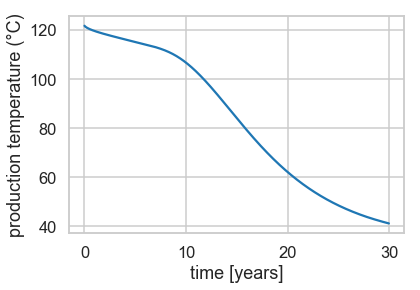

In [5]:
plt.plot(d['t[d]']/365.25, d['T[C]'])
plt.xlabel('time [years]')
plt.ylabel('production temperature (°C)')
plt.savefig('../imgs/prod_temp.png', dpi=300, bbox_inches='tight')

In [6]:
Q = 0.1
rho = 998
cp = 4180
tin = 20

pth = (d['T[C]']-tin)*Q*rho*cp
pel = .1*pth-500000

eelst = d['dt[d]']*24*pel /1000
eelg = np.cumsum(eelst)

In [16]:
print("The thermal power over 30 years decreased by {:.2f} %".format((pth.iloc[0]-pth.iloc[-1])/pth.iloc[0]*100))

The thermal power over 30 years decreased by 79.19 %


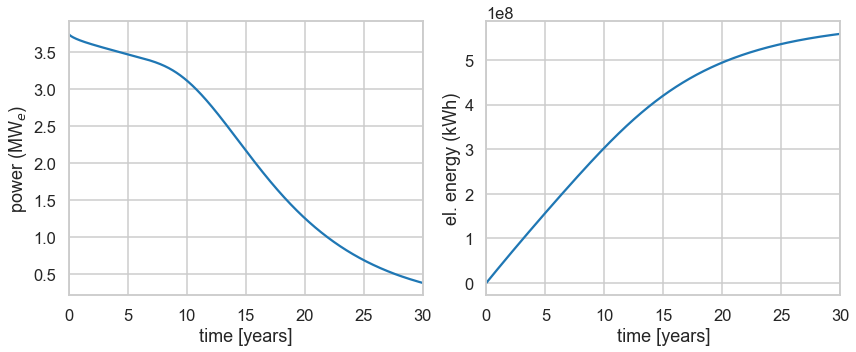

In [7]:
fig, axs = plt.subplots(1,2, figsize=[12,5])
axs[0].plot(d['t[d]']/365.25, pel/1e6)
axs[0].set_ylabel('power (MW$_e$)')
axs[0].set_xlabel('time [years]')
axs[0].set_xlim([0,30])

axs[1].plot(d['t[d]']/365.25, eelg)
axs[1].set_xlim([0,30])
axs[1].set_ylabel('el. energy (kWh)')
axs[1].set_xlabel('time [years]')

fig.tight_layout()
fig.savefig('../imgs/power_energy.png', dpi=300, bbox_inches='tight')